In [4]:
# libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator
import time

#Visualizers
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef

#Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

#Neural Network
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Lambda, Layer, ReLU
from keras.models import load_model
import tensorflow as tf
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D,Concatenate

import warnings
warnings.filterwarnings('ignore')

In [5]:
data_path6 = 'Epileptic Seizure Recognition.csv'


In [6]:
Data = pd.read_csv(data_path6)

In [7]:
Data=Data.drop(["Unnamed"],axis=1)

In [8]:
Labels = Data['y'].values
Features = Data.drop(['y'],axis=1).values


print('Features shape:', Features.shape)
print('Labels shape:', Labels.shape)

Features shape: (11500, 178)
Labels shape: (11500,)


In [9]:
for i in range(len(Labels)):
  Labels[i] = Labels[i]-1

In [10]:
#Write function for class-centric metrics
# Classification report
def CR_viz():
    def Class_report(model,classes):
        visualizer = ClassificationReport(model, classes=classes, support=True)
        train_start_time = time.time()
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        print(f'Train runtime: {time.time()-train_start_time}')
        test_start_time = time.time()
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        print(f'Test runtime: {time.time()-test_start_time}')
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        Class_report(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CR.pdf")

#Class Prediction Error
def CPE_viz():
    def CPE(model,classes):
        visualizer = ClassPredictionError(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        CPE(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CPE.pdf")

#Confusion matrix
def CM_viz():
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes, percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        CM(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CM.pdf")

#ROC-AUC
def ROC_viz():
    def ROC(model,classes):
        visualizer = ROCAUC(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        ROC(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_ROC.pdf")

#Precision Recall Curve
def PRC_viz():
    def PRC(model,classes):
        visualizer = PrecisionRecallCurve(model,classes=classes, per_class=True, iso_f1_curves=False,
    fill_area=False, micro=False)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        PRC(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_PRC.pdf")

In [11]:
# Write function for aggregate metrics
def classifier_metrics():
    def metrics(model):
        #     model=model_name()
        model.fit(X_train, y_train)  # Fit the visualizer and the model
        y_pred = model.predict(X_test)
        try:
            y_prob = model.predict_proba(X_test)
            log_metric = log_loss(y_test,y_prob)
        except:
            y_prob = "Not probablistic"
            log_metric = 0
        else:
            y_pred = model.predict(X_test)

        acc_score=accuracy_score(y_test,y_pred)
        c_k_s=cohen_kappa_score(y_test,y_pred)
        zero_met=zero_one_loss(y_test,y_pred)
        hl=hamming_loss(y_test,y_pred)
        mc=matthews_corrcoef(y_test,y_pred)
        print('accuracy_score: {0:.4f}'.format(acc_score))
        print('cohen_kappa_score: {0:.4f}'.format(c_k_s))
        print('log_loss: {0:.4f}'.format(log_metric))
        print('zero_one_loss: {0:.4f}'.format(zero_met))
        print('hemming_loss: {0:.4f}'.format(hl))
        print('matthews_corrcoef: {0:.4f}'.format(mc))
    for name in classifiers:
        print (str(name))
        metrics(name)
        print()
        print ("---------------------------------------------------------------------------------")

In [12]:
class KerasBatchClassifier(KerasClassifier, BaseEstimator):
    def __init__(self, model, **kwargs):
        super().__init__(model)
        self.fit_kwargs = kwargs
        self._estimator_type = 'classifier'

    def fit(self, x, y, *args, **kwargs):
        y = np.array(y)
        if len(y.shape) == 2 and y.shape[1] > 1:
          self.classes_ = np.arange(y.shape[1])
        elif (len(y.shape) == 2 and y.shape[1] == 1) or len(y.shape) == 1:
          self.classes_ = np.unique(y)
          y = np.searchsorted(self.classes_, y)
        else:
          raise ValueError('Invalid shape for y: ' + str(y.shape))
        self.n_classes_ = len(self.classes_)
        return super(KerasClassifier, self).fit(x, y, **self.fit_kwargs)


# RED NEURONAL
def FullyConnected():
  inputs = Input(shape=(X_train.shape[1],), name="input_1")
  layers = Dense(512, activation="selu")(inputs)
  layers = Dense(256, activation="selu")(layers)
  layers = Dense(128, activation="selu")(layers)
  layers = Dense(64, activation="selu")(layers)

#agregar capas
  predictions = Dense(len(classes), activation="softmax", name="output_1")(layers)
  model = Model(inputs = inputs, outputs=predictions)
  optimizer=RMSprop()
  model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [13]:
X_train, X_test, y_train, y_test = train_test_split(Features, Labels, test_size=0.2, stratify=Labels, random_state=42)

print('Train data shape:', X_train.shape)
print('Train labels shape:', y_train.shape)
print('Test data shape:', X_test.shape)
print('Test labels shape:', y_test.shape)

Train data shape: (9200, 178)
Train labels shape: (9200,)
Test data shape: (2300, 178)
Test labels shape: (2300,)


In [14]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=0.96,svd_solver='full',tol=1e-4)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test=pca.transform(X_test)

In [15]:
print('X_PCA:',X_train.shape)

X_PCA: (9200, 41)


In [16]:
#classes
classes = [0, 1, 2, 3, 4]

In [17]:
# select classifiers
classifiers=[
DecisionTreeClassifier(criterion= 'gini', min_samples_leaf= 4, min_samples_split=10),#ok
MLPClassifier(activation='relu', hidden_layer_sizes=(100, 50), learning_rate= 'constant', solver= 'adam'), #ok
KNeighborsClassifier(algorithm='auto', leaf_size= 1, n_neighbors= 1, p= 1, weights= 'uniform'),#ok
SGDClassifier(alpha=0.01, loss= 'hinge', max_iter=1000, penalty='l1'),
ExtraTreesClassifier(n_estimators=300, random_state=20), #Definitivo
svm.SVC(C=10, gamma= 'auto', kernel= 'rbf'), #Definitivo
RandomForestClassifier(max_depth= None, min_samples_split= 2, n_estimators= 500, random_state=40), #Definitivo
GradientBoostingClassifier(learning_rate= 0.1, max_depth=7, n_estimators=200, random_state= 10), #Definitivo
]

names=['ET', 'SVM', 'RF','GB','ET', 'SVM', 'RF','GB']

Train runtime: 0.7469151020050049
Test runtime: 0.03612112998962402


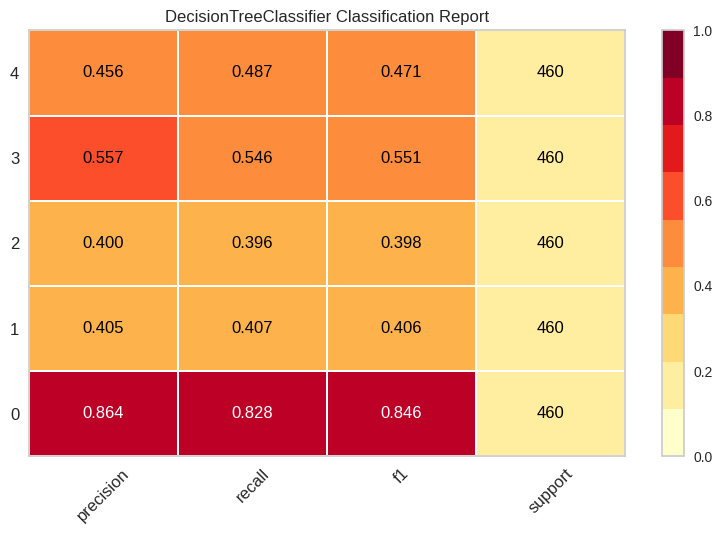

Train runtime: 29.565175533294678
Test runtime: 0.06601858139038086


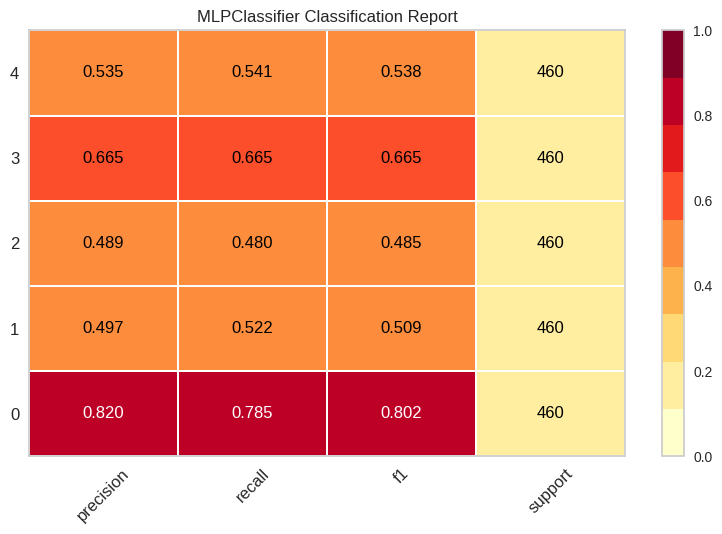

Train runtime: 0.002391338348388672
Test runtime: 2.1253035068511963


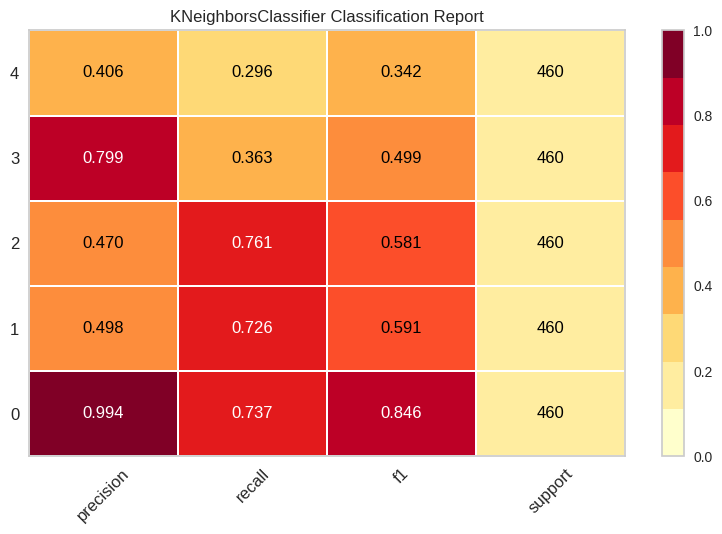

Train runtime: 0.4172642230987549
Test runtime: 0.053327083587646484


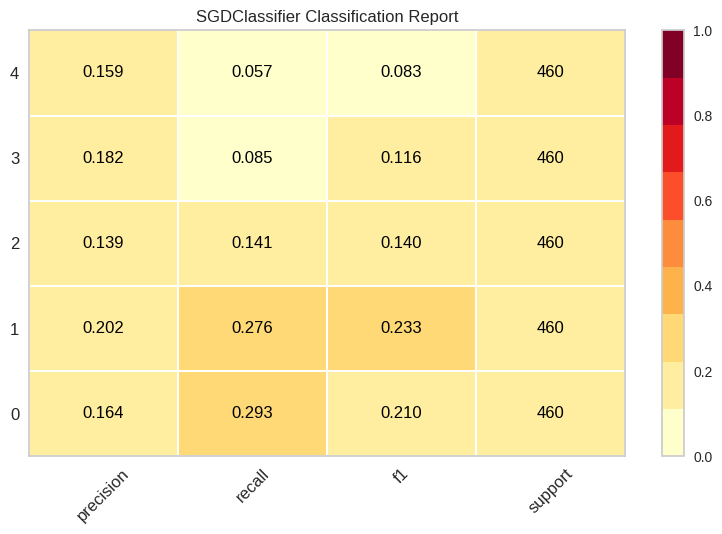

Train runtime: 4.848052024841309
Test runtime: 0.5489754676818848


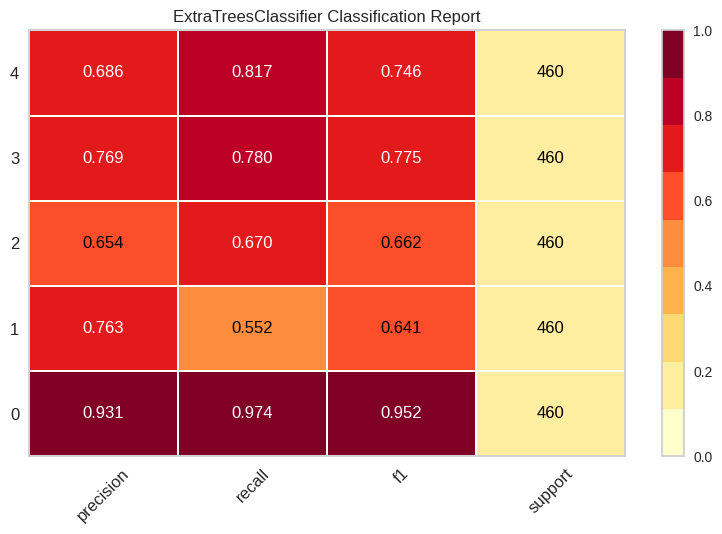

Train runtime: 9.920279264450073
Test runtime: 3.957364559173584


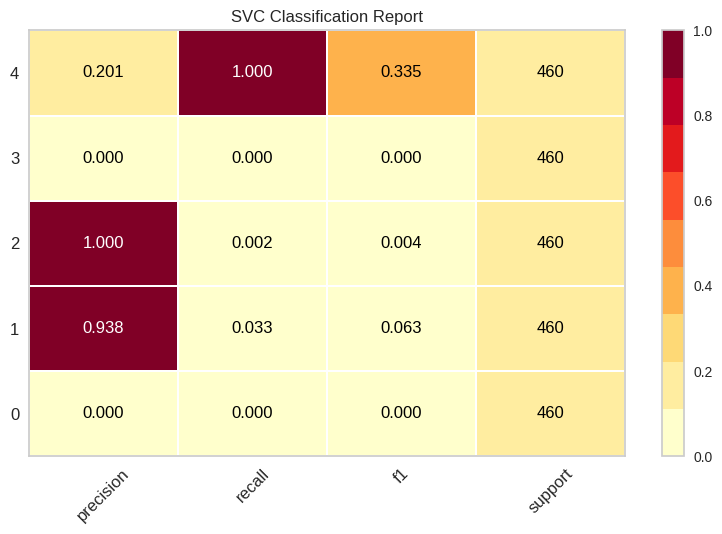

Train runtime: 43.0266547203064
Test runtime: 0.6335384845733643


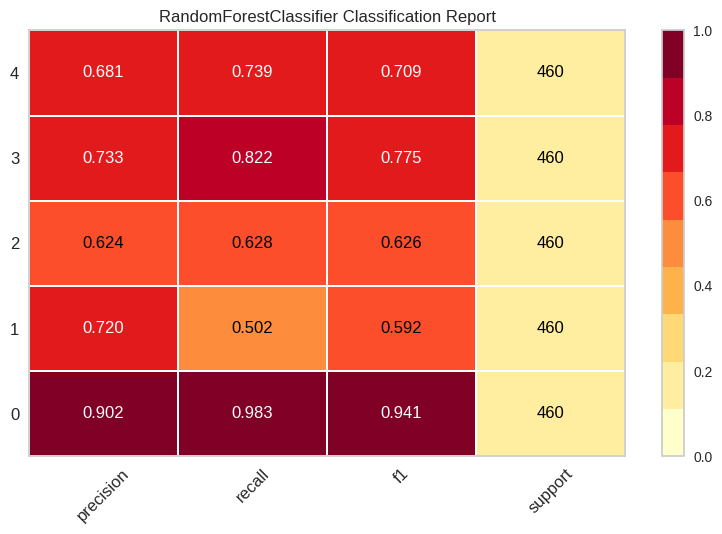

Train runtime: 306.1795644760132
Test runtime: 0.21954560279846191


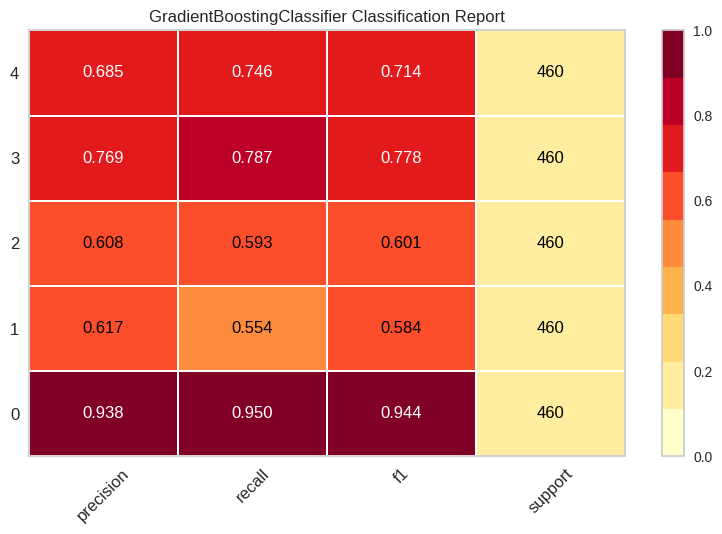

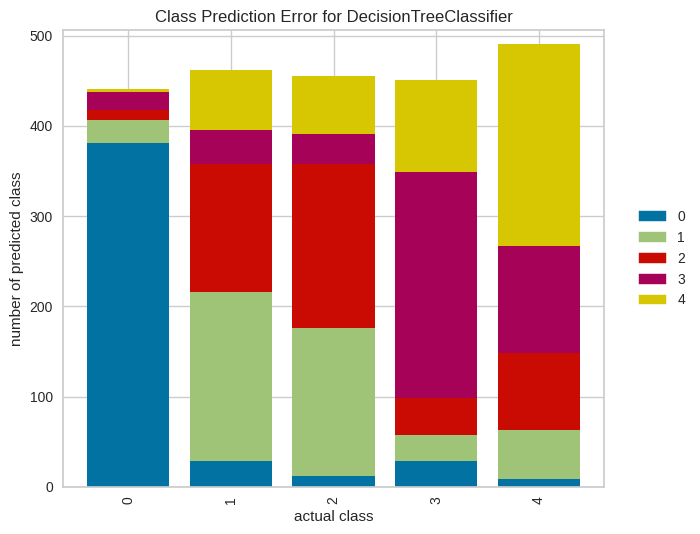

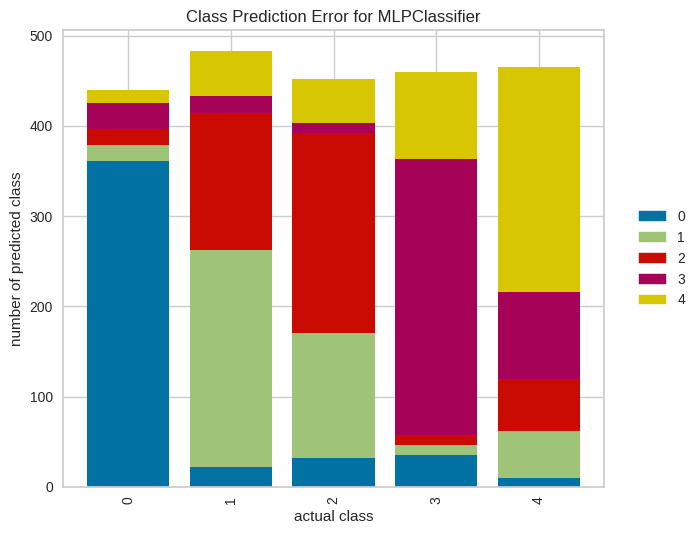

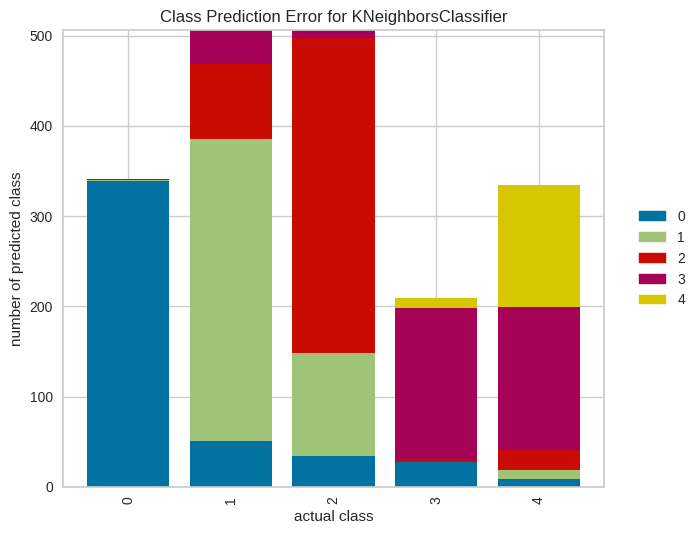

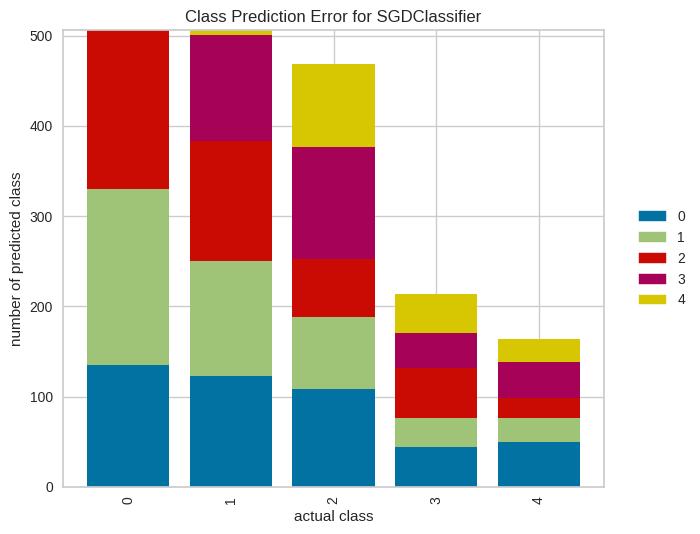

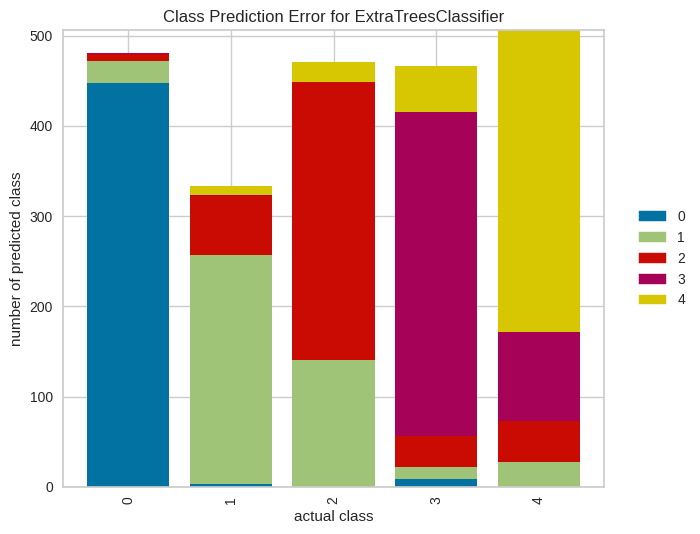

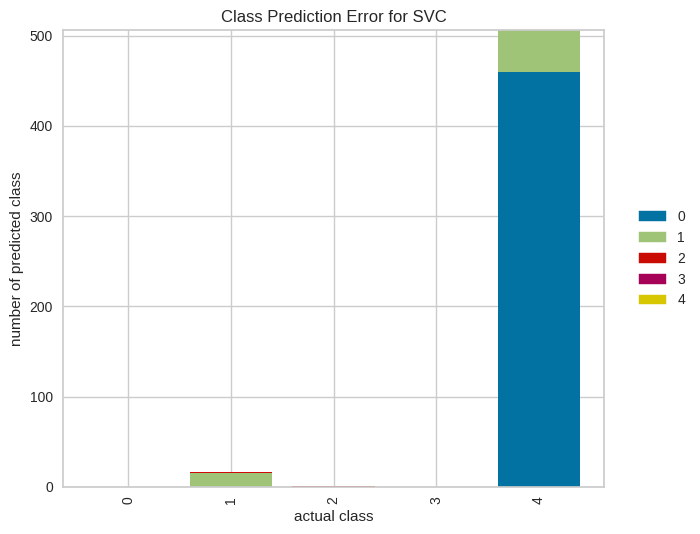

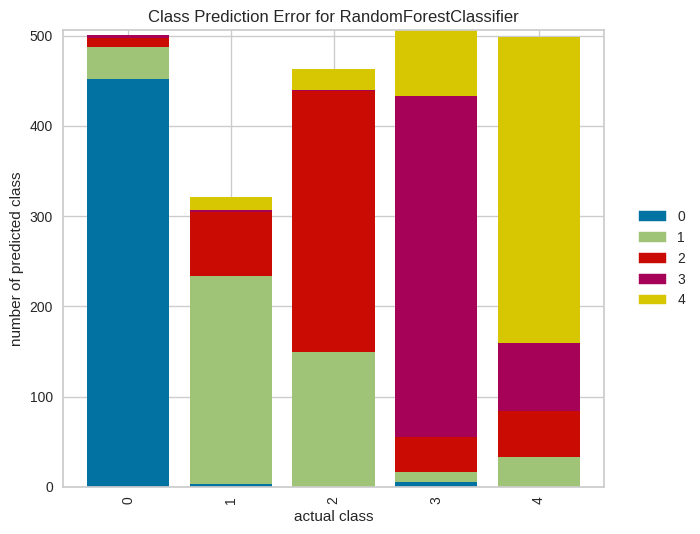

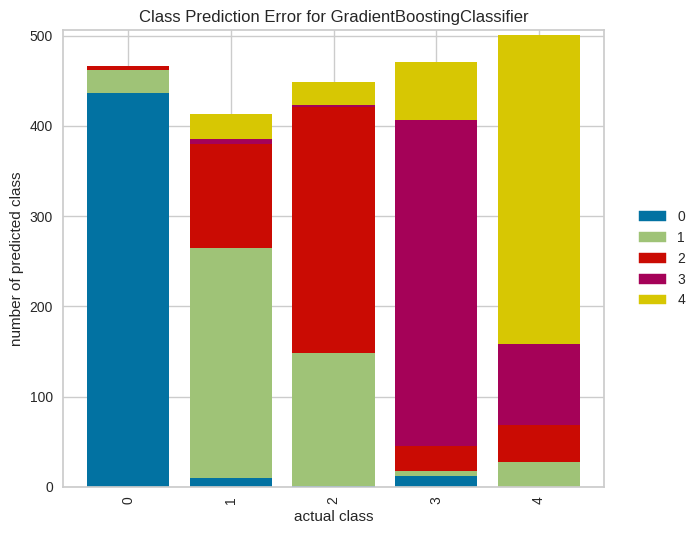

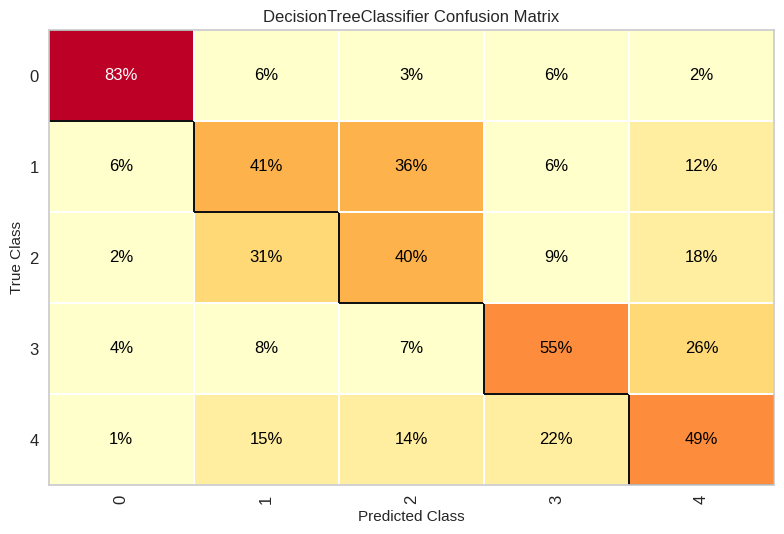

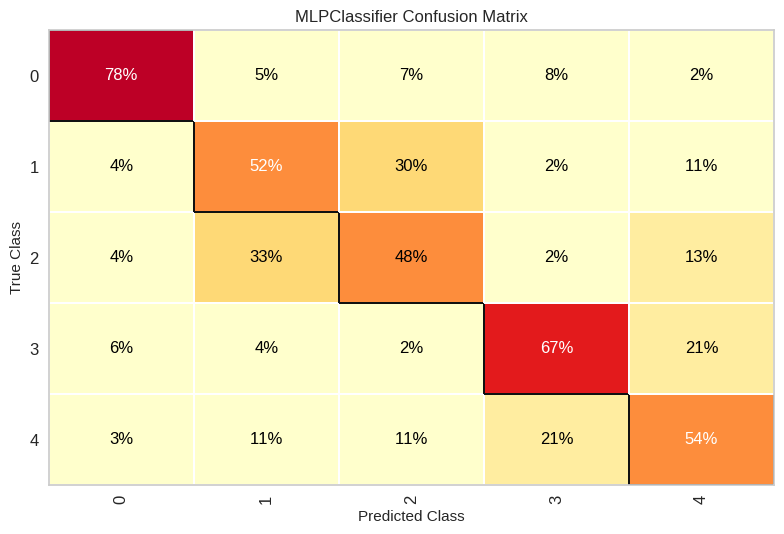

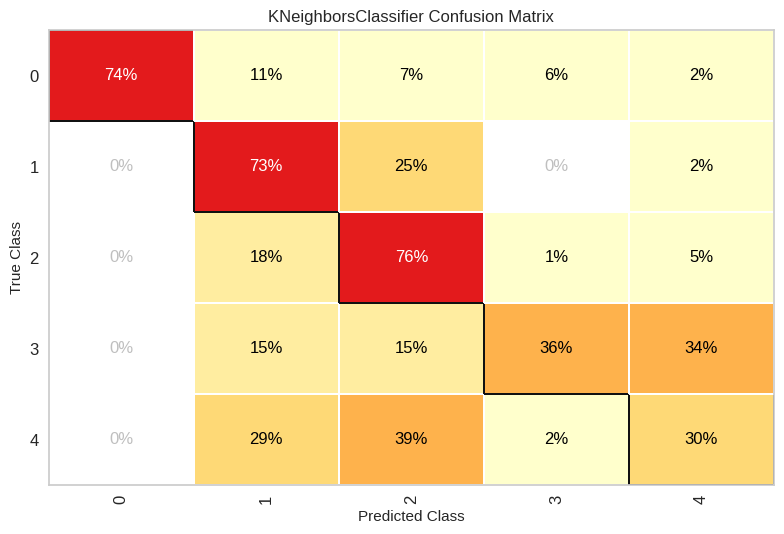

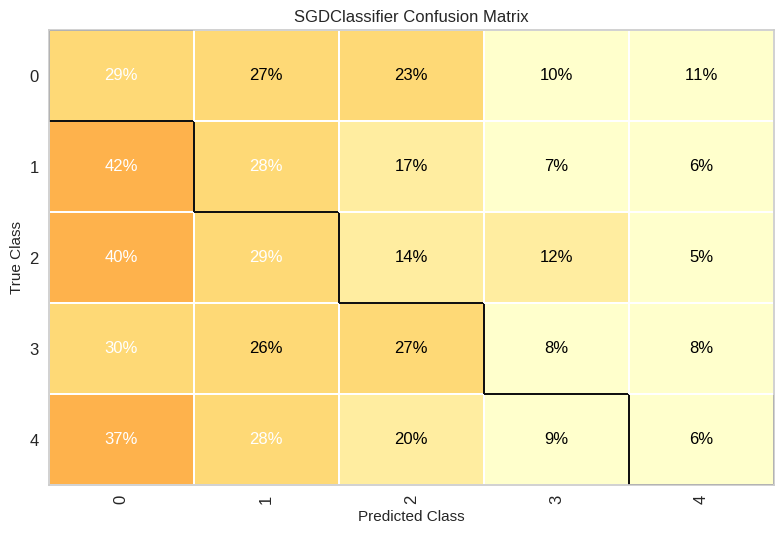

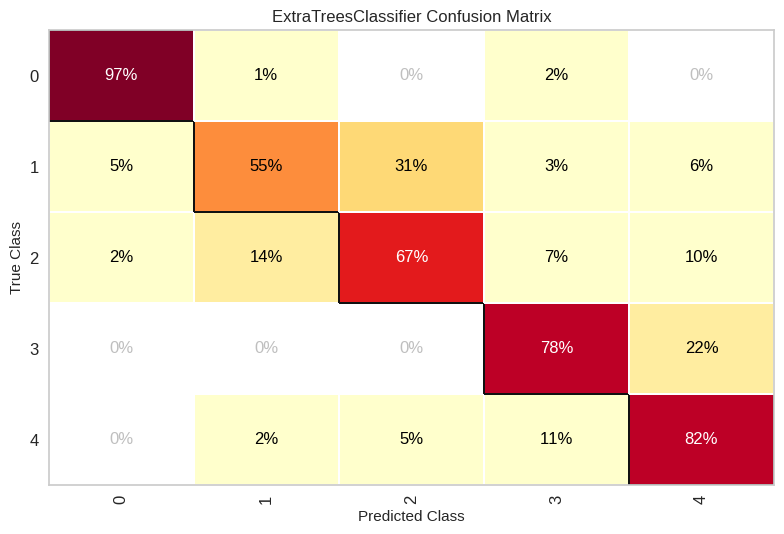

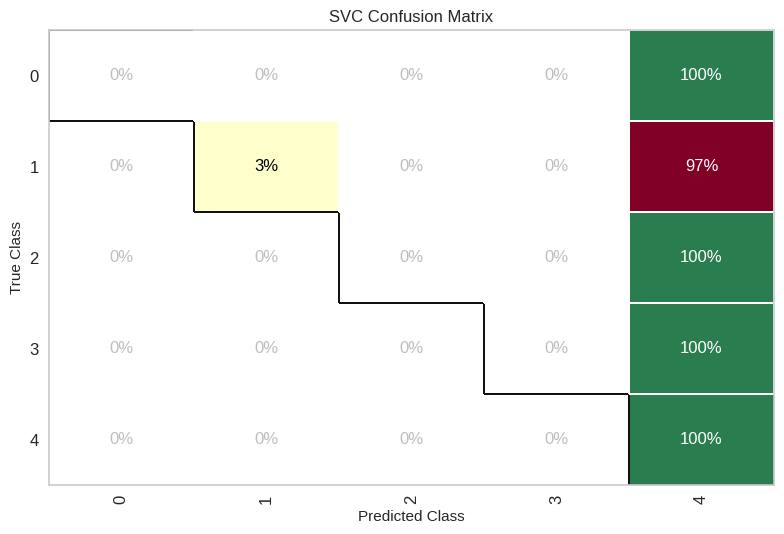

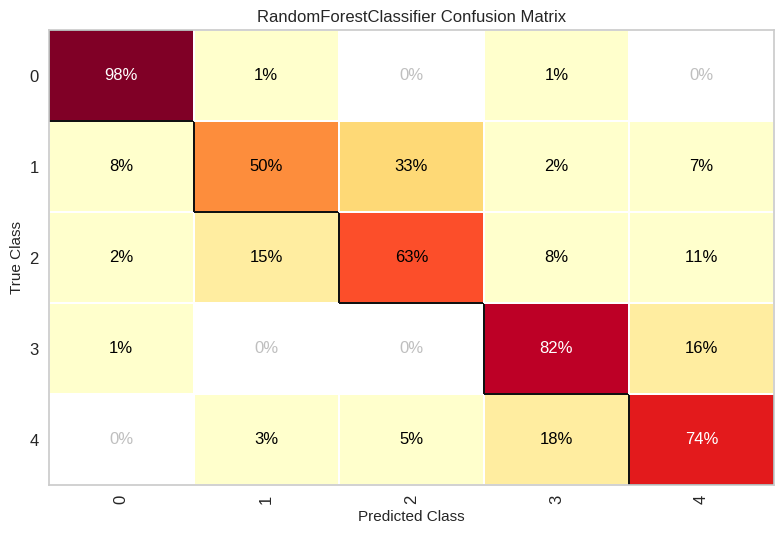

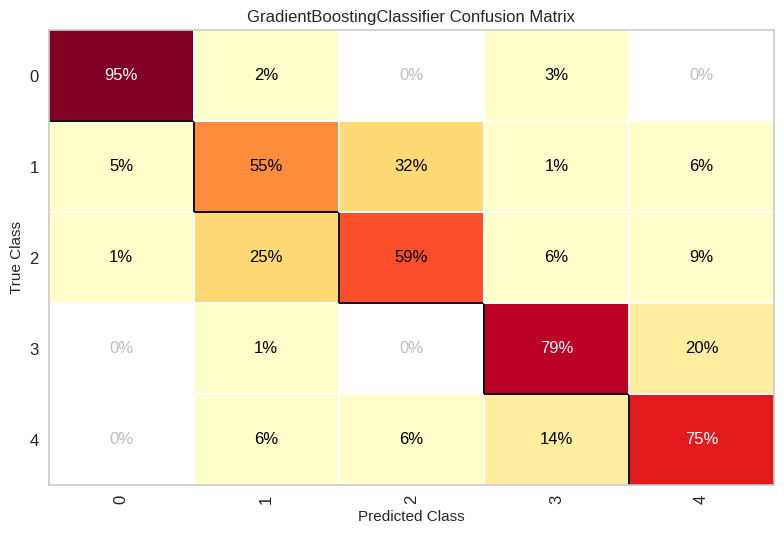

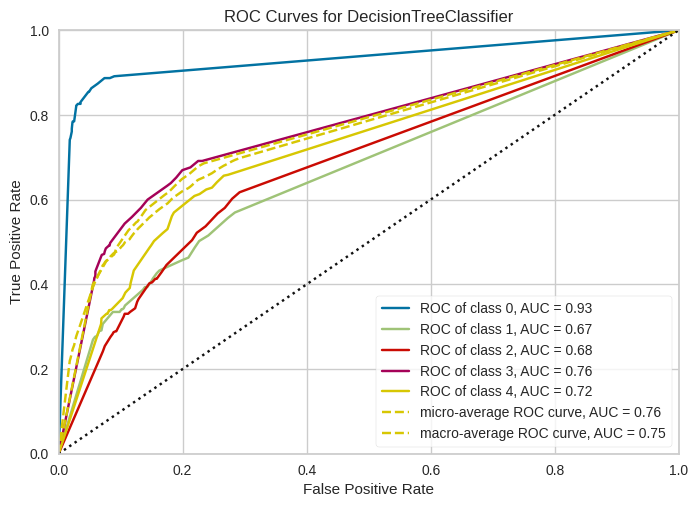

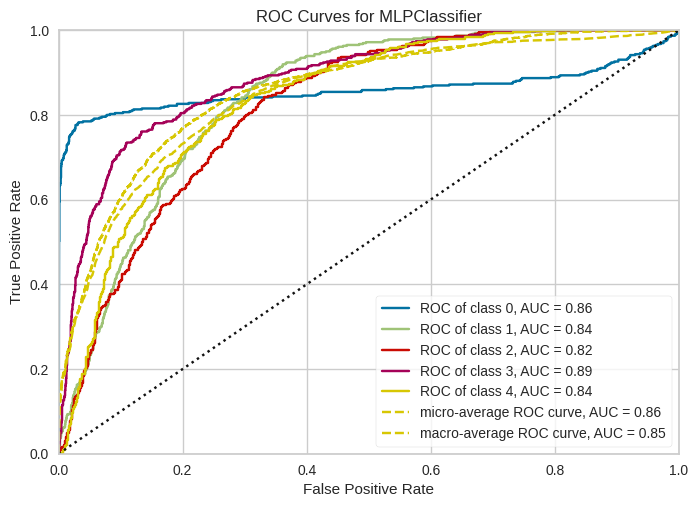

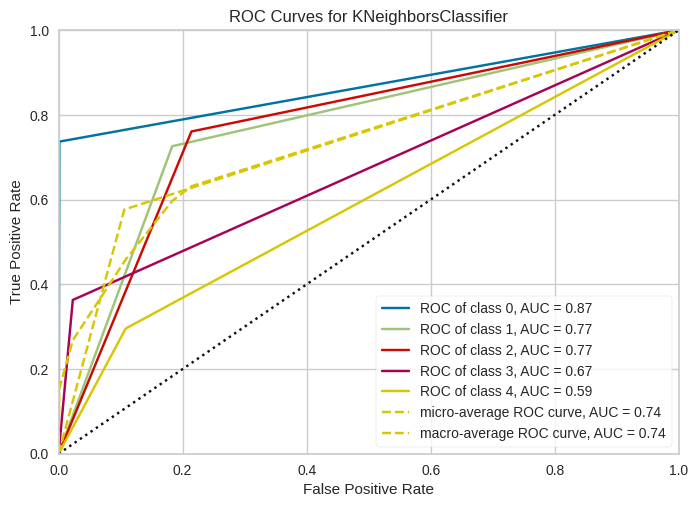

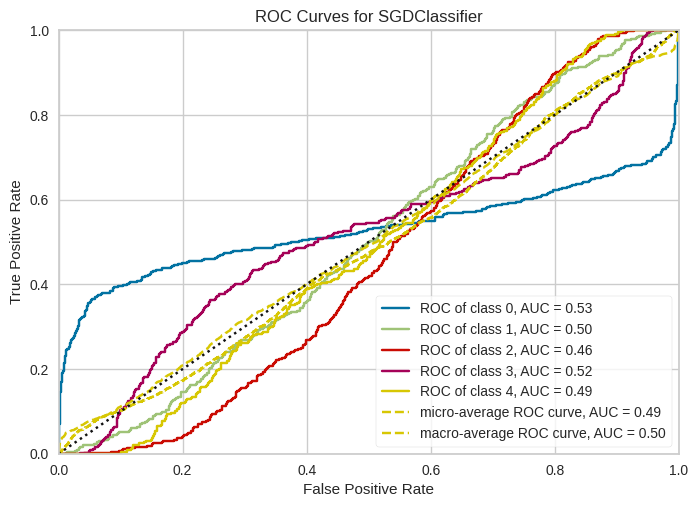

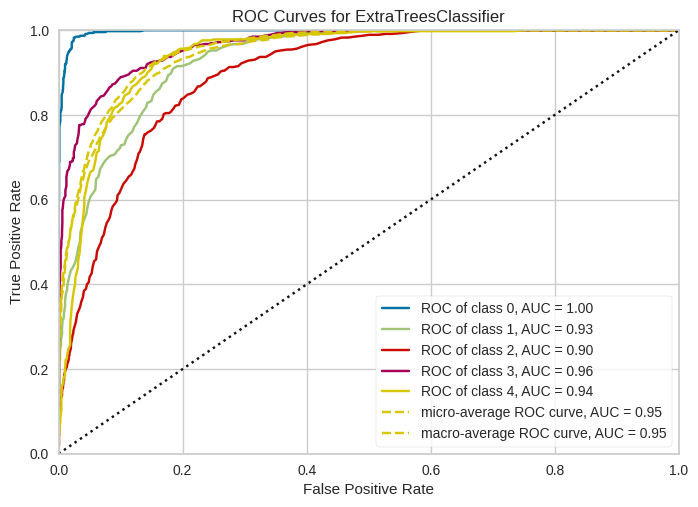

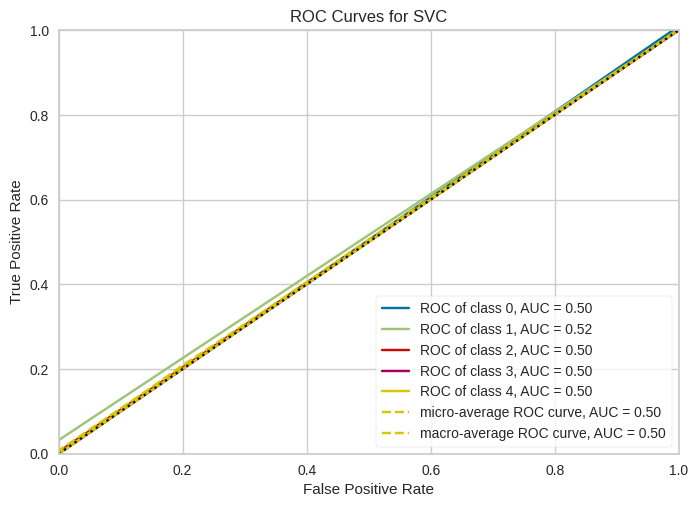

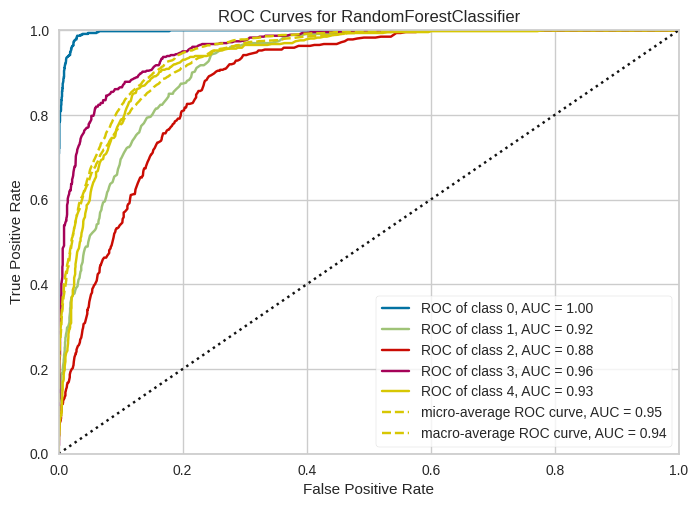

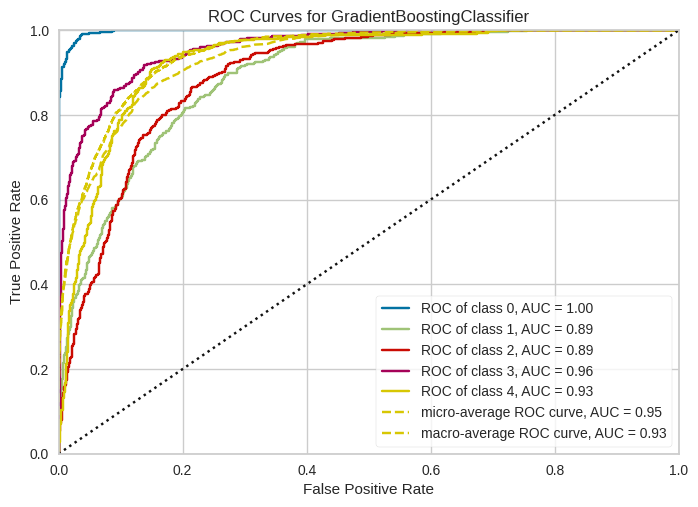

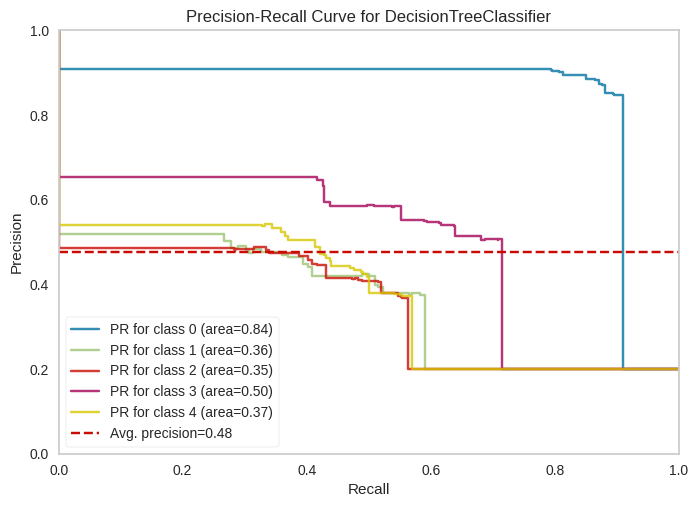

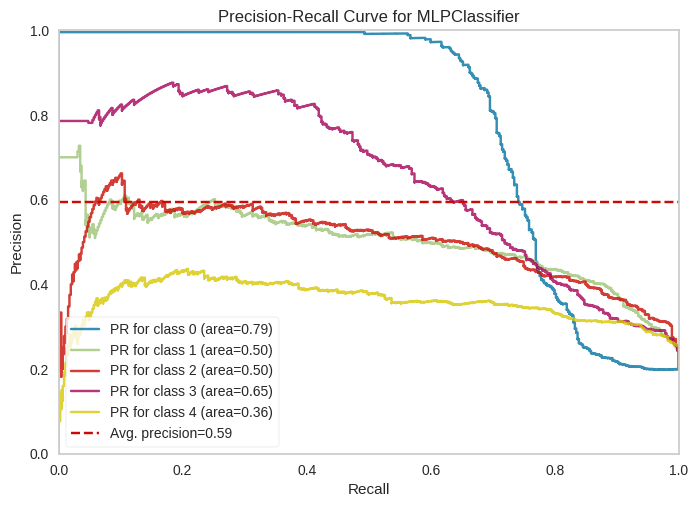

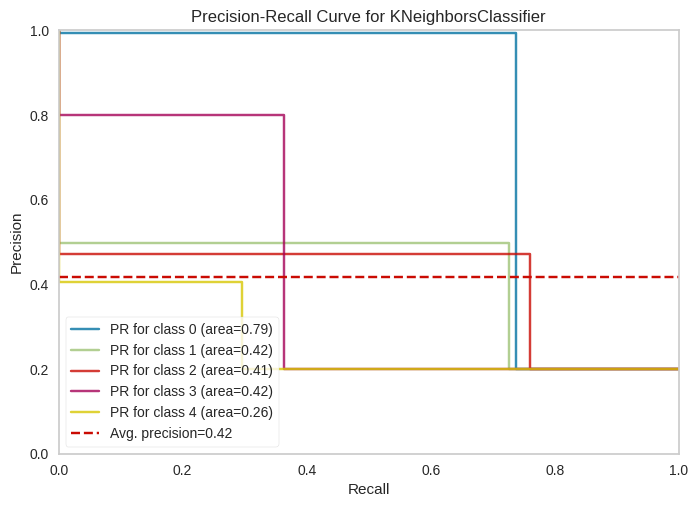

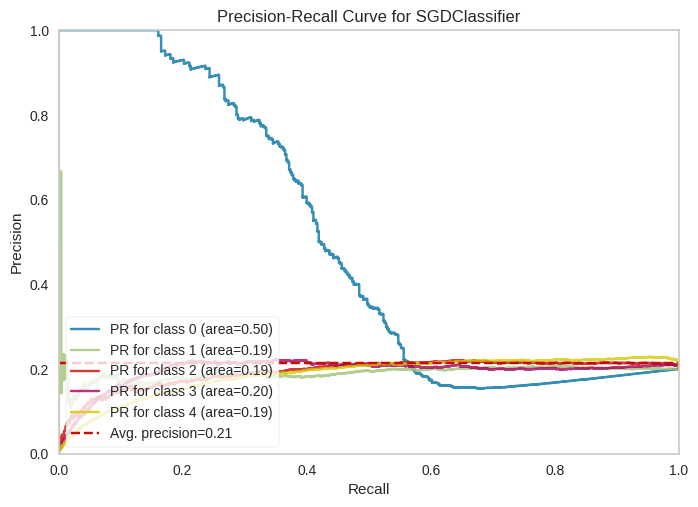

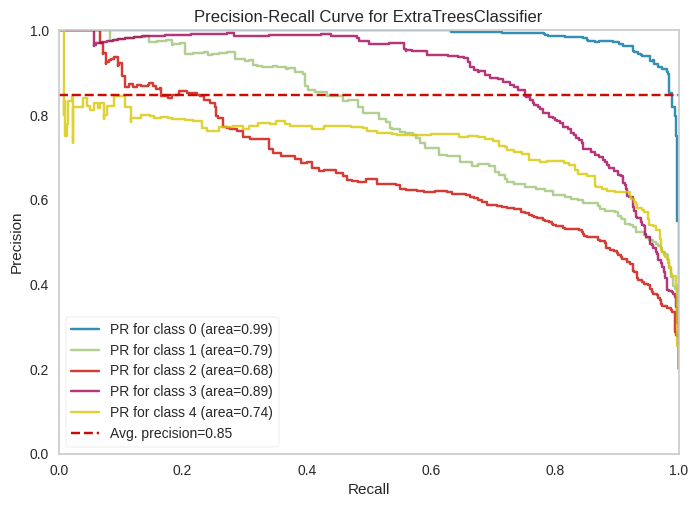

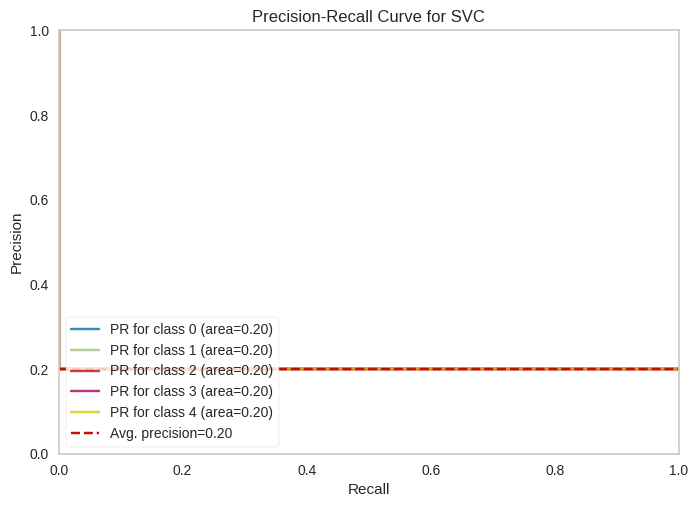

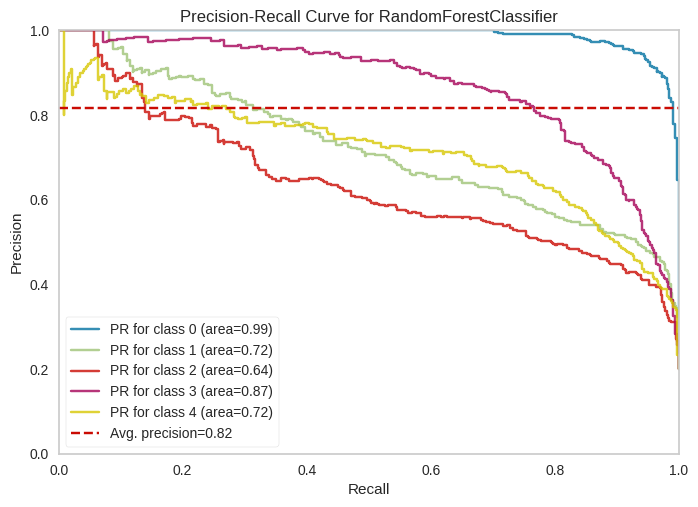

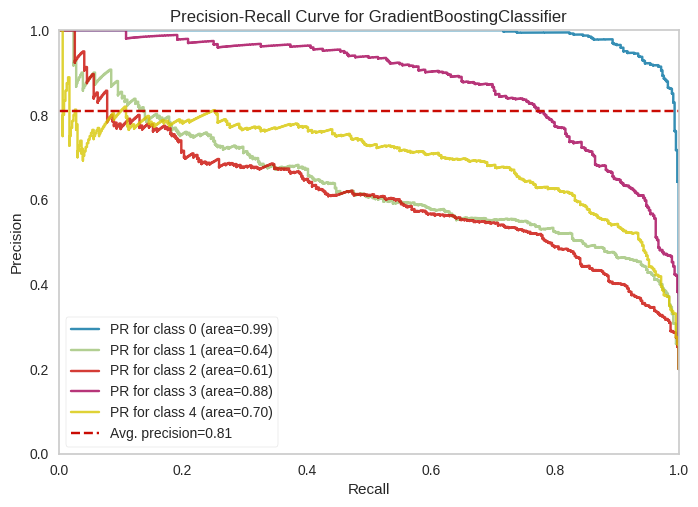

In [18]:
visualization =[CR_viz(),CPE_viz(),CM_viz(),ROC_viz(),PRC_viz()]

In [19]:
classifier_metrics()

DecisionTreeClassifier(min_samples_leaf=4, min_samples_split=10)
accuracy_score: 0.5361
cohen_kappa_score: 0.4201
log_loss: 11.4752
zero_one_loss: 0.4639
hemming_loss: 0.4639
matthews_corrcoef: 0.4202

---------------------------------------------------------------------------------
MLPClassifier(hidden_layer_sizes=(100, 50))
accuracy_score: 0.5583
cohen_kappa_score: 0.4478
log_loss: 2.1118
zero_one_loss: 0.4417
hemming_loss: 0.4417
matthews_corrcoef: 0.4480

---------------------------------------------------------------------------------
KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1)
accuracy_score: 0.5765
cohen_kappa_score: 0.4707
log_loss: 15.2637
zero_one_loss: 0.4235
hemming_loss: 0.4235
matthews_corrcoef: 0.4833

---------------------------------------------------------------------------------
SGDClassifier(alpha=0.01, penalty='l1')
accuracy_score: 0.2030
cohen_kappa_score: 0.0038
log_loss: 0.0000
zero_one_loss: 0.7970
hemming_loss: 0.7970
matthews_corrcoef: 0.0040

-----